In [1]:
using BenchmarkTools
using Plots

include("../src/Cosmojuly.jl")
import .Cosmojuly as cj

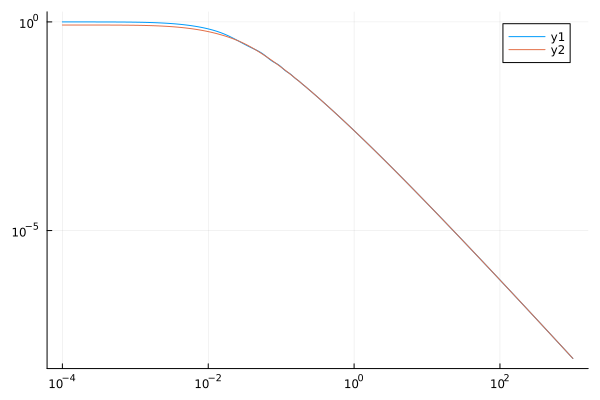

In [2]:
k = 10 .^(range(-4,stop=3,length=5000))

plot(k, abs.(cj.transfer_function.(k, with_baryons=true)), yscale=:log10, xscale=:log10)
plot!(k, abs.(cj.transfer_function.(k, with_baryons=false)), yscale=:log10, xscale=:log10)

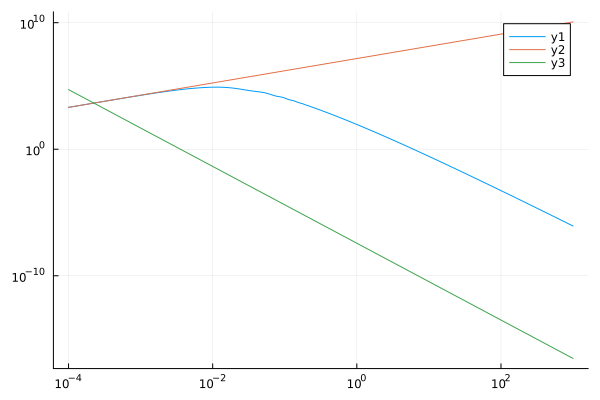

In [3]:
k = 10 .^(range(-4,stop=3,length=5000))

trivial_cosmo = cj.Cosmology(cj.planck18_bkg, k->cj.power_spectrum_ΛCDM(k), cj.TrivialTF)

plot(k,  cj.matter_power_spectrum.(k), yscale=:log10, xscale=:log10)
plot!(k, cj.matter_power_spectrum.(k, cosmology = trivial_cosmo), yscale=:log10, xscale=:log10)
plot!(k, cj.curvature_power_spectrum.(k), yscale=:log10, xscale=:log10)

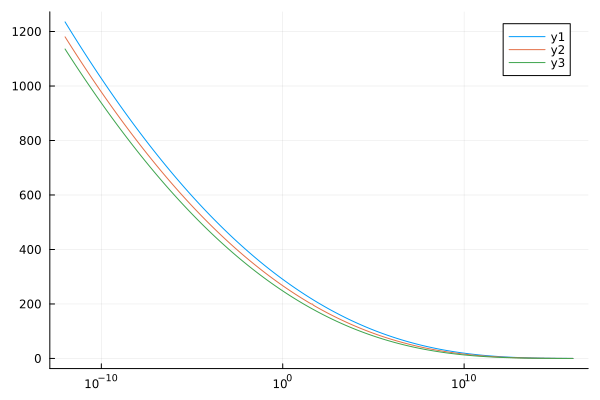

In [2]:
m = 10 .^(range(-12,stop=16,length=500))
plot(m, cj.σ²_vs_M.(m, cj.SharpK), xscale=:log10)
plot!(m, cj.σ²_vs_M.(m, cj.TopHat), xscale=:log10)
plot!(m, cj.σ²_vs_M.(m, cj.Gaussian), xscale=:log10)

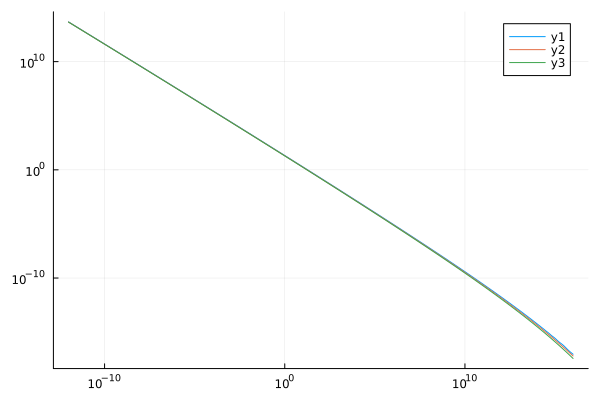

In [3]:
m = 10 .^(range(-12,stop=16,length=500))
plot(m, abs.(cj.dσ²_dM.(m, cj.SharpK)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ²_dM.(m, cj.TopHat)), xscale=:log10, yscale=:log10)
plot!(m, abs.(cj.dσ²_dM.(m, cj.Gaussian)), xscale=:log10, yscale=:log10)

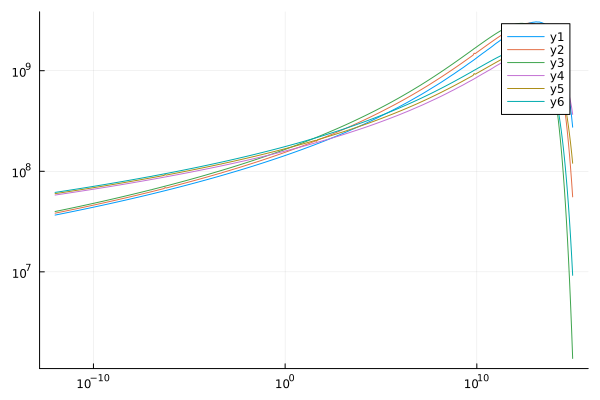

In [23]:
m = 10 .^(range(-12,stop=15,length=500))
plot(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.PressSchechter), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.PressSchechter), xscale=:log10, yscale=:log10)

plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.SharpK, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.TopHat, cj.SethTormen), xscale=:log10, yscale=:log10)
plot!(m,  m.^2 .* cj.dn_dM.(m, 0, cj.Gaussian, cj.SethTormen), xscale=:log10, yscale=:log10)